In [120]:
import xarray as xr
import sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [121]:
sys.path.append('/workspace/bkraft/dl_chapter14/src')
from utils.plotting import plot_map, subplots_robinson
from utils.metrics import get_metrics

Added some useful functions, I will add more (e.g. plotting time-eries). Please don't change source code. You can also just use your own stuff or copy my functions and change them, or let me know if you want to have something changed.

## Data

In [122]:
# Local directory: '/scratch/dl_chapter14/'
# Code directory: '/workspace/bkraft/dl_chapter14/'

# Predictions
# Space optimized (faster operations on space, e.g. spatial mean, plotting maps)
dss = xr.open_zarr('/scratch/dl_chapter14/experiments/hydro/runoff/pred/predictions_so.zarr/')
# Time optimized (faster operations on time, e.g. temporal mean, plotting time-series)
dst = xr.open_zarr('/scratch/dl_chapter14/experiments/hydro/runoff/pred/predictions_to.zarr/')

In [143]:
europe_raw = dss.sel(lat= slice(85,30), lon= slice(-10, 80))

In [165]:
europe_msc = europe_raw.groupby('time.year').mean('time')
europe_std = europe_raw.groupby('time.year').std('time')
europe_anomaly = europe_raw.groupby('time.year') - europe_2003_msc
europe_anomaly_standarise = (europe_raw.groupby('time.year') - europe_msc) / europe_std


ValueError: incompatible dimensions for a grouped binary operation: the group variable 'year' is not a dimension on the other argument

In [160]:
europe_anomaly_standarise

<xarray.Dataset>
Dimensions:  (lat: 110, lon: 180, month: 12, time: 5478)
Coordinates:
  * lon      (lon) float32 -9.75 -9.25 -8.75 -8.25 ... 78.25 78.75 79.25 79.75
  * lat      (lat) float32 84.75 84.25 83.75 83.25 ... 31.75 31.25 30.75 30.25
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2014-12-30
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mod      (time, lat, lon, month) float32 dask.array<chunksize=(1, 110, 180, 1), meta=np.ndarray>
    obs      (time, lat, lon, month) float32 dask.array<chunksize=(1, 110, 180, 1), meta=np.ndarray>

In [156]:
europe_anomaly_2003_standarise = europe_anomaly_standarise.sel(time = "2003").chunk({'time': -1})

In [147]:
met = get_metrics(europe_anomaly.mod, europe_anomaly.obs, funs=['rmse', 'corr', 'mef'])

11/13/2019, 16:22:15: calculating metrics [rmse, corr, mef]
11/13/2019, 16:22:15: - rmse
11/13/2019, 16:22:47: - corr
11/13/2019, 16:23:17: - mef
11/13/2019, 16:23:43: done; elapsed time: 1 min 28 sec


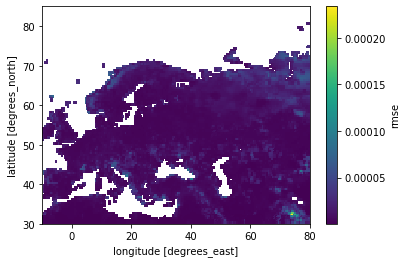

In [151]:
met.rmse.plot()

In [161]:
europe_anomaly_2003_standarise

<xarray.Dataset>
Dimensions:  (lat: 110, lon: 180, month: 12, time: 365)
Coordinates:
  * lon      (lon) float32 -9.75 -9.25 -8.75 -8.25 ... 78.25 78.75 79.25 79.75
  * lat      (lat) float32 84.75 84.25 83.75 83.25 ... 31.75 31.25 30.75 30.25
  * time     (time) datetime64[ns] 2003-01-01 2003-01-02 ... 2003-12-31
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mod      (time, lat, lon, month) float32 dask.array<chunksize=(365, 110, 180, 1), meta=np.ndarray>
    obs      (time, lat, lon, month) float32 dask.array<chunksize=(365, 110, 180, 1), meta=np.ndarray>

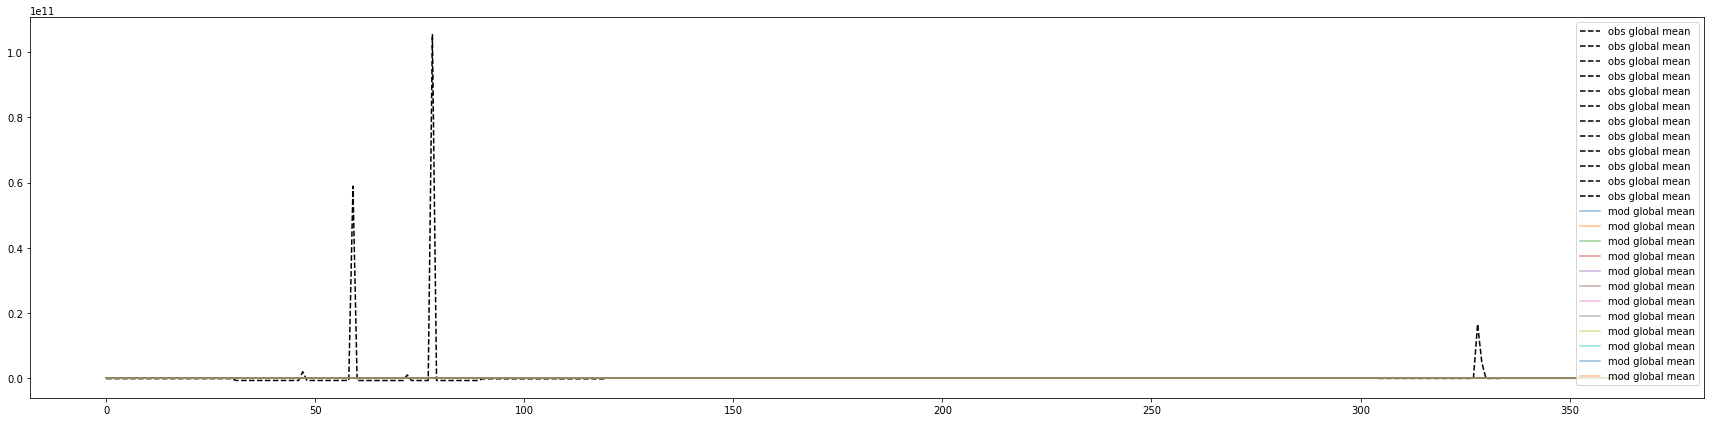

In [157]:
plt.figure(figsize=(30, 7))

plt.plot(europe_anomaly_2003_standarise.obs.mean(('lat', 'lon')), 'k--', label='obs global mean')
plt.plot(europe_anomaly_2003_standarise.mod.mean(('lat', 'lon')), alpha=0.5, label='mod global mean')
plt.legend()

## Plotting

In [29]:
plot_map(dss.obs.isel(time="2001-01-01"), robust=True)

IndexError: index 978307200000000000 is out of bounds for axis 0 with size 5478

## Calculate metrics

In [44]:
met = get_metrics(dst.mod, dst.obs, funs=['rmse', 'corr', 'mef'])

11/13/2019, 11:27:15: calculating metrics [rmse, corr, mef]
11/13/2019, 11:27:15: - rmse
11/13/2019, 11:27:28: - corr
11/13/2019, 11:27:49: - mef
11/13/2019, 11:28:01: done; elapsed time: 0 min 45 sec


In [47]:
dst

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 5478)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2014-12-30
Data variables:
    mod      (time, lat, lon) float32 dask.array<chunksize=(5478, 15, 15), meta=np.ndarray>
    obs      (time, lat, lon) float32 dask.array<chunksize=(5478, 15, 15), meta=np.ndarray>
Attributes:
    contact:      bkraft@bgc-jena.mpg.de, sbesnard@bgc-jena.mpg.de
    created:      Nov 12 2019
    description:  LSTM emulation of physical process model (Koirala et al. (2...
    long_name:    Total runoff
    var:          mrro

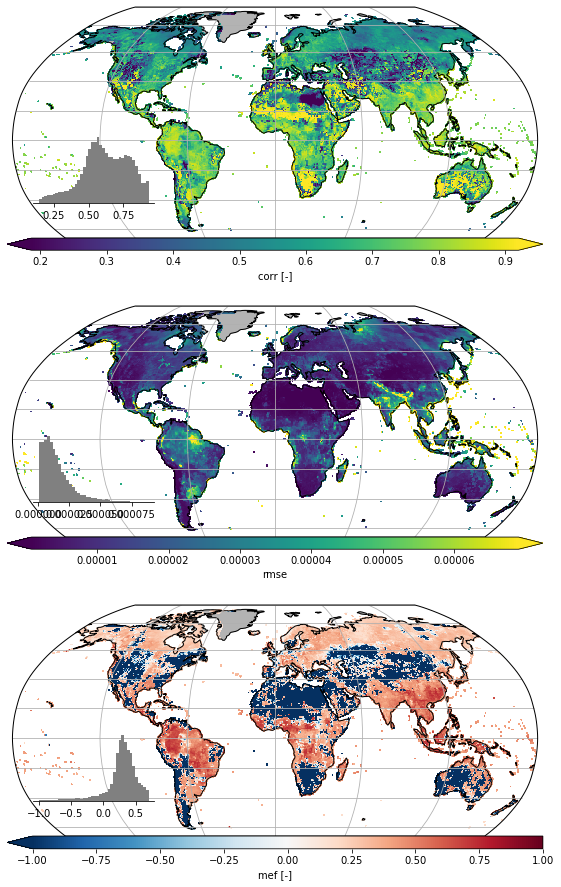

In [7]:
fig, axes = subplots_robinson(3, 1, figsize=(12, 16), gridspec_kw={'hspace': 0.1})

plot_map(met.corr, robust=True, ax=axes[0])
plot_map(met.rmse, robust=True, ax=axes[1])
plot_map(met.mef, vmin=-1, robust=True, ax=axes[2])